In [1]:

from analyze import analyze_data
from utils import RequestData
import json
total_requests = 207775
input_lengths = list(range(10, 2049, 256))
# input_lengths.remove(1034) # TODO: remove it
labels = ["aggregation", "mooncake(tcp)", "mooncake(rdma)","lmcache"]
log_dirs_map = {}
log_dirs_map[labels[0]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-01-09/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-09-01/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-09-01/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-09-01/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-09-01/run_3",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-17-32/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-17-32/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-20-17-32/run_2",
]
log_dirs_map[labels[1]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-23-29/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-23-29/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-29-16/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-23-29/run_3",
    "/mnt/network_drive/lrq/logs/logs_2025-07-01-14-06-48/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-29-16/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-29-16/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-29-16/run_3",
]

log_dirs_map[labels[2]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-17-28-38/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-17-49-52/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-17-55-29/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-17-59-58/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-18-04-20/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-18-09-14/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-18-15-39/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-07-03-18-20-12/run_0",
    
]

log_dirs_map[labels[3]] = [
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-22-42-09/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-22-56-52/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-22-56-52/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-22-56-52/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-07-01-14-01-42/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-03-56/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-03-56/run_2",
    "/mnt/network_drive/lrq/logs/logs_2025-06-30-23-03-56/run_3",
]



metrics_list = []
requests_list_map = {}
for label, log_dirs in log_dirs_map.items(): 
    requests_list_map[label] = []
    for log_dir in log_dirs:
        report_file_path = analyze_data(log_dir, metrics_list)
        with open(report_file_path, 'r') as f:
            report = json.load(f)

        loadgen_data = report['loadgen_data']
        requests = []
        for request_data in loadgen_data:
            if 'error' not in request_data.keys():
                request = RequestData.init_from_dict(request_data)
                requests.append(request)
                continue
        requests_list_map[label].append(requests)


QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus startup.
Running Python app...
query_metrics_list: []
params_list: []
QUERY_PROM is 0, skipping Prometheus 

In [2]:
def get_avg_ttft(requests):
    sum_ttft = 0
    request_count = 0
    for request in requests:
        if request.error_msg != "":
            continue
        sum_ttft += request.ttft
        request_count += 1
    avg_ttft = sum_ttft / request_count
    print(f"We've got {request_count} correct requests!")
    return avg_ttft

def get_avg_transfer_latency(requests):
    sum_t_latency = 0
    request_count = 0
    for request in requests:
        if request.error_msg != "":
            continue
        if request.waiting_latency != 0:
            print(f"transfer_latency: {request.waiting_latency}")
        sum_t_latency += request.waiting_latency
        request_count += 1
    avg = sum_t_latency / request_count
    return avg

def get_avg_tpot(requests):
    sum_tpot = 0
    request_count = 0
    for request in requests:
        if request.error_msg != "":
            continue
        tpot = request.decode_latency / request.decode_tokens
        sum_tpot += tpot
        request_count += 1
    avg_tpot = sum_tpot / request_count
    return avg_tpot



In [3]:
avg_ttfts_map = {}
avg_transfer_latencys_map = {}
avg_tpots_map = {}
for label, requests_list in requests_list_map.items():
    print(f"Analyzing {label}'s latency metrics")
    avg_ttfts = []
    avg_transfer_latencys = []
    avg_tpots = []
    for requests in requests_list:
        if requests == []: continue
        avg_ttft = get_avg_ttft(requests)
        avg_transfer_latency = get_avg_transfer_latency(requests)
        avg_tpot = get_avg_tpot(requests)

        avg_ttfts.append(avg_ttft)
        avg_transfer_latencys.append(avg_transfer_latency)
        avg_tpots.append(avg_tpot)

    avg_ttfts_map[label] = avg_ttfts
    avg_transfer_latencys_map[label] = avg_transfer_latencys
    avg_tpots_map[label] = avg_tpots


Analyzing aggregation's latency metrics
We've got 12 correct requests!
We've got 9 correct requests!
We've got 10 correct requests!
We've got 9 correct requests!
We've got 10 correct requests!
We've got 9 correct requests!
We've got 9 correct requests!
We've got 9 correct requests!
Analyzing mooncake(tcp)'s latency metrics
We've got 8 correct requests!
transfer_latency: 0.011008024215698242
transfer_latency: 0.00624847412109375
transfer_latency: 0.0059506893157958984
transfer_latency: 0.006483554840087891
transfer_latency: 0.0064661502838134766
transfer_latency: 0.006514787673950195
transfer_latency: 0.005932807922363281
transfer_latency: 0.006495475769042969
We've got 9 correct requests!
transfer_latency: 0.04960203170776367
transfer_latency: 0.046105384826660156
transfer_latency: 0.04758644104003906
transfer_latency: 0.04460716247558594
transfer_latency: 0.04419088363647461
transfer_latency: 0.048102617263793945
transfer_latency: 0.04427218437194824
transfer_latency: 0.04412984848022

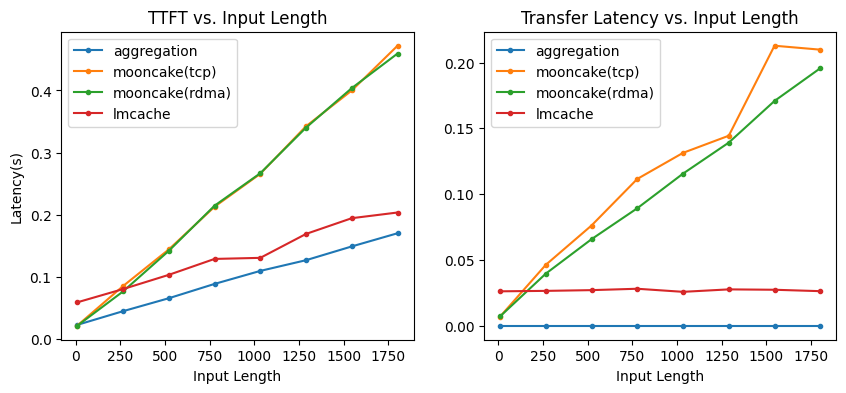

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
for label, avg_ttfts in avg_ttfts_map.items():
    if avg_ttfts == []: continue
    len_values = len(avg_ttfts)
    axes[0].plot(input_lengths[:len_values], avg_ttfts, label=label, marker='.')
axes[0].set_title(f"TTFT vs. Input Length")
axes[0].set_ylabel(f"Latency(s)")
axes[0].set_xlabel(f"Input Length")
axes[0].legend()

for label, avg_transfer_latencys in avg_transfer_latencys_map.items():
    if avg_transfer_latencys == []: continue
    len_values = len(avg_transfer_latencys)
    axes[1].plot(input_lengths[:len_values], avg_transfer_latencys, label=label, marker='.')
axes[1].set_title(f"Transfer Latency vs. Input Length")
# axes[1].set_ylabel(f"Transfer Latency(s)")
axes[1].set_xlabel(f"Input Length")
axes[1].legend()

# for label, avg_tpots in avg_tpots_map.items():
#     if avg_tpots == []: continue
#     axes[2].plot(input_lengths, avg_tpots, label=label, marker='.')
# axes[2].set_title(f"TPOT vs. Input Length")
# # axes[2].set_ylabel(f"TPOT(s)")
# axes[2].set_xlabel(f"Input Length")
# axes[2].legend()